In [1]:
import xlrd
from datetime import datetime
import os
import re
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 提取数据

In [ ]:


folder_path = "../data/raw/fengqiao/discharge_fengqiao/"

discharge_data = {}

def get_starting_row(sheet):
    for row in range(sheet.nrows):
        cell_value = str(sheet.cell_value(rowx=row, colx=0)).strip()
        if cell_value in ["1", "1.0"]:
            return row
    return None

for file in os.listdir(folder_path):
    if file.endswith(".xls"):
        year_match = re.search(r'(\d{4})年', file)
        if year_match:
            year = int(year_match.group(1))
            print(f"正在处理: {file}")  # 输出当前正在处理的文件名
            filename = os.path.join(folder_path, file)
            workbook = xlrd.open_workbook(filename)
            sheet = workbook.sheet_by_index(0)

            starting_row = get_starting_row(sheet)
            if starting_row is None:
                print(f"错误：在 {file} 中找不到起始行。")
                continue

            for col in range(2, 14):  # 从第二列开始，到第13列结束（包括12个月）
                month = col - 1
                for day in range(0, 31):  # 从第0天开始，到第31天结束
                    date_str = f"{year}-{month:02d}-{day+1:02d}"
                    
                    # 检查当前单元格是否有数据
                    row = starting_row + day
                    cell_value = sheet.cell_value(rowx=row, colx=col)
                    try:
                        cell_value = float(cell_value)
                        is_number = True
                    except ValueError:
                        is_number = False
                    
                    if cell_value and is_number:
                        discharge = cell_value
                        
                        # 将数据存储在字典中
                        discharge_data[date_str] = discharge

print("数据提取完成。")

# 根据日期对数据进行排序并写入文件
with open("../data/intermediate/discharge_fengqiao.txt", "w", encoding="utf-8") as txt_file:
    txt_file.write("time discharge\n")
    for date_str, discharge in sorted(discharge_data.items()):
        txt_file.write(f"{date_str} {discharge:.2f}\n")

print("已保存到 discharge_fengqiao.txt 文件中。")

In [ ]:
folder_path = "../data/raw/fengqiao/precipitation_fengqiao/"

precipitation_data = {}

def get_starting_row(sheet):
    for row in range(sheet.nrows):

        cell_value_first_col = str(sheet.cell_value(rowx=row, colx=0)).strip()
        cell_value_second_col = str(sheet.cell_value(rowx=row, colx=1)).strip()
        
        if cell_value_first_col == "日期" or cell_value_second_col == "日期":
            return row + 1
        
        if cell_value_first_col in ["1", "1.0", '1.00'] or cell_value_second_col in ["1", "1.0", '1.00']:
            return row
    return None


for file in os.listdir(folder_path):
    if file.endswith(".xls"):
        year_match = re.search(r'(\d{4})年', file)
        if year_match:
            year = int(year_match.group(1))
            print(f"正在处理: {file}")  # 输出当前正在处理的文件名
            filename = os.path.join(folder_path, file)
            workbook = xlrd.open_workbook(filename)
            sheet = workbook.sheet_by_index(0)

            starting_row = get_starting_row(sheet)
            total_columns = sheet.ncols
            starting_col = total_columns - 12
            if starting_row is None:
                print(f"错误：在 {file} 中找不到起始行。")
                continue

            for col in range(starting_col,starting_col + 12):  # 从第二列开始，到第13列结束（包括12个月）
                month = col - 1
                for day in range(0, 31):  # 从第0天开始，到第31天结束
                    date_str = f"{year}-{month:02d}-{day+1:02d}"
                    
                    # 检查当前单元格是否有数据
                    row = starting_row + day
                    cell_value = sheet.cell_value(rowx=row, colx=col)
                    # 使用正则表达式匹配数字（包括小数点）
                    number_match = re.search(r'(\d+(\.\d+)?)', cell_value)
                    if number_match:
                        cell_value = float(number_match.group(1))
                        is_number = True
                    else:
                        is_number = False
                    
                    if cell_value and is_number:
                        precipitation = cell_value
                        
                        # 将数据存储在字典中
                        precipitation_data[date_str] = precipitation

print("数据提取完成。")

# 根据日期对数据进行排序并写入文件
with open("../data/intermediate/precipitation_fengqiao.txt", "w", encoding="utf-8") as txt_file:
    txt_file.write("time precipitation\n")
    for date_str, precipitation in sorted(precipitation_data.items()):
        txt_file.write(f"{date_str} {precipitation:.2f}\n")

print("已保存到 precipitation_fengqiao.txt 文件中。")

In [37]:
folder_path = "../data/raw/fengqiao/water_level_fengqiao/"

water_level_data = {}

import math

def process_data(value, previous_value):
    int_part = math.floor(float(previous_value))
    return int_part + float(value)/100

def is_two_decimal(value):
    str_value = str(value)
    dot_index = str_value.find('.')
    if dot_index != -1:
        return True
    return False

def get_starting_row(sheet):
    for row in range(sheet.nrows):

        cell_value_first_col = str(sheet.cell_value(rowx=row, colx=0)).strip()
        cell_value_second_col = str(sheet.cell_value(rowx=row, colx=1)).strip()
        
        if cell_value_first_col == "日期" or cell_value_second_col == "日期":
            return row + 1
        
        if cell_value_first_col in ["1", "1.0", '1.00'] or cell_value_second_col in ["1", "1.0", '1.00']:
            return row
    return None



for file in os.listdir(folder_path):
    if file.endswith(".xls"):
        year_match = re.search(r'(\d{4})年', file)
        if year_match:
            year = int(year_match.group(1))
            #print(f"正在处理: {file}")  # 输出当前正在处理的文件名
            filename = os.path.join(folder_path, file)
            workbook = xlrd.open_workbook(filename)
            sheet = workbook.sheet_by_index(0)

            starting_row = get_starting_row(sheet)
            starting_col = 2
            if starting_row is None:
                print(f"错误：在 {file} 中找不到起始行。")
                continue

            for col in range(starting_col, starting_col + 12): 
                month = col - 1
                previous_value = None  # 添加此行
                for day in range(0, 31):  # 从第0天开始，到第31天结束
                    date_str = f"{year}-{month:02d}-{day+1:02d}"
                                
                    # 检查当前单元格是否有数据
                    row = starting_row + day
                    cell_value = str(sheet.cell_value(rowx=row, colx=col)).strip()

                    if cell_value:
                        if previous_value is not None and not is_two_decimal(cell_value):
                            water_level = process_data(cell_value, previous_value)
                        else:
                            water_level = float(cell_value)
                        previous_value = water_level
                                    
                        # 将数据存储在字典中
                        water_level_data[date_str] = water_level



print("数据提取完成。")

# 根据日期对数据进行排序并写入文件
with open("../data/intermediate/water_level_fengqiao.txt", "w", encoding="utf-8") as txt_file:
    txt_file.write("time water_level\n")
    for date_str, water_level in sorted(water_level_data.items()):
        txt_file.write(f"{date_str} {water_level}\n")

print("已保存到 water_level_fengqiao.txt 文件中。")

数据提取完成。
已保存到 water_level_fengqiao.txt 文件中。


In [ ]:
folder_path = "../data/raw/suzhou/precipitation_suzhou/"

precipitation_data = {}

def get_starting_row(sheet):
    for row in range(sheet.nrows):

        cell_value_first_col = str(sheet.cell_value(rowx=row, colx=0)).strip()
        cell_value_second_col = str(sheet.cell_value(rowx=row, colx=1)).strip()
        
        if cell_value_first_col == "日期" or cell_value_second_col == "日期":
            return row + 1
        
        if cell_value_first_col in ["1", "1.0", '1.00'] or cell_value_second_col in ["1", "1.0", '1.00']:
            return row
    return None


for file in os.listdir(folder_path):
    if file.endswith(".xls"):
        year_match = re.search(r'(\d{4})年', file)
        if year_match:
            year = int(year_match.group(1))
            print(f"正在处理: {file}")  # 输出当前正在处理的文件名
            filename = os.path.join(folder_path, file)
            workbook = xlrd.open_workbook(filename)
            sheet = workbook.sheet_by_index(0)

            starting_row = get_starting_row(sheet)
            total_columns = sheet.ncols
            starting_col = total_columns - 12
            if starting_row is None:
                print(f"错误：在 {file} 中找不到起始行。")
                continue

            for col in range(starting_col,starting_col + 12):  # 从第二列开始，到第13列结束（包括12个月）
                month = col - 1
                for day in range(0, 31):  # 从第0天开始，到第31天结束
                    date_str = f"{year}-{month:02d}-{day+1:02d}"
                    
                    # 检查当前单元格是否有数据
                    row = starting_row + day
                    cell_value = sheet.cell_value(rowx=row, colx=col)
                    # 使用正则表达式匹配数字（包括小数点）
                    number_match = re.search(r'(\d+(\.\d+)?)', cell_value)
                    if number_match:
                        cell_value = float(number_match.group(1))
                        is_number = True
                    else:
                        is_number = False
                    
                    if cell_value and is_number:
                        precipitation = cell_value
                        
                        # 将数据存储在字典中
                        precipitation_data[date_str] = precipitation

print("数据提取完成。")

# 根据日期对数据进行排序并写入文件
with open("../data/intermediate/precipitation_suzhou.txt", "w", encoding="utf-8") as txt_file:
    txt_file.write("time precipitation\n")
    for date_str, precipitation in sorted(precipitation_data.items()):
        txt_file.write(f"{date_str} {precipitation:.2f}\n")

print("已保存到 precipitation_suzhou.txt 文件中。")

In [48]:
folder_path = "../data/raw/suzhou/water_level_suzhou/"

water_level_data = {}

import math

def process_data(value, previous_value):
    int_part = math.floor(float(previous_value))
    return int_part + float(value)/100

def is_two_decimal(value):
    str_value = str(value)
    dot_index = str_value.find('.')
    if dot_index != -1:
        return True
    return False

def can_convert_to_float(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

def get_starting_row(sheet):
    for row in range(sheet.nrows):

        cell_value_first_col = str(sheet.cell_value(rowx=row, colx=0)).strip()
        cell_value_second_col = str(sheet.cell_value(rowx=row, colx=1)).strip()
        
        if cell_value_first_col == "日期" or cell_value_second_col == "日期":
            return row + 1
        
        if cell_value_first_col in ["1", "1.0", '1.00'] or cell_value_second_col in ["1", "1.0", '1.00']:
            return row
    return None



for file in os.listdir(folder_path):
    if file.endswith(".xls"):
        year_match = re.search(r'(\d{4})年', file)
        if year_match:
            year = int(year_match.group(1))
            #print(f"正在处理: {file}")  # 输出当前正在处理的文件名
            filename = os.path.join(folder_path, file)
            workbook = xlrd.open_workbook(filename)
            sheet = workbook.sheet_by_index(0)

            starting_row = get_starting_row(sheet)
            starting_col = 2
            if starting_row is None:
                print(f"错误：在 {file} 中找不到起始行。")
                continue

            for col in range(starting_col, starting_col + 12): 
                month = col - 1
                previous_value = None  # 添加此行
                for day in range(0, 31):  # 从第0天开始，到第31天结束
                    date_str = f"{year}-{month:02d}-{day+1:02d}"
                                            
                    # 检查当前单元格是否有数据
                    row = starting_row + day
                    cell_value = str(sheet.cell_value(rowx=row, colx=col)).strip()

                    if cell_value:
                        if can_convert_to_float(cell_value):  # 如果可以转换为浮点数，则处理数据
                            if previous_value is not None and not is_two_decimal(cell_value):
                                water_level = process_data(cell_value, previous_value)
                            else:
                                water_level = float(cell_value)
                            previous_value = water_level
                        else:  # 如果无法转换为浮点数，则使用上一个数据
                            water_level = previous_value

                        # 将数据存储在字典中
                        water_level_data[date_str] = water_level




print("数据提取完成。")

# 根据日期对数据进行排序并写入文件
with open("../data/intermediate/water_level_suzhou.txt", "w", encoding="utf-8") as txt_file:
    txt_file.write("time water_level\n")
    for date_str, water_level in sorted(water_level_data.items()):
        txt_file.write(f"{date_str} {water_level}\n")

print("已保存到 water_level_suzhou.txt 文件中。")

数据提取完成。
已保存到 water_level_suzhou.txt 文件中。


# 组合成dataframe形式

In [55]:
import pandas as pd

# 读取文件到各自的 DataFrame
discharge_fengqiao = pd.read_csv('../data/intermediate/discharge_fengqiao.txt', sep=' ', parse_dates=['time'])
precipitation_fengqiao = pd.read_csv('../data/intermediate/precipitation_fengqiao.txt', sep=' ', parse_dates=['time'])
water_level_fengqiao = pd.read_csv('../data/intermediate/water_level_fengqiao.txt', sep=' ', parse_dates=['time'])

# 确保所有时间列都为 datetime 类型
discharge_fengqiao['time'] = pd.to_datetime(discharge_fengqiao['time'])
precipitation_fengqiao['time'] = pd.to_datetime(precipitation_fengqiao['time'])
water_level_fengqiao['time'] = pd.to_datetime(water_level_fengqiao['time'])

# 创建一个包含所有日期的新 DataFrame
start_date = min(discharge_fengqiao['time'].min(), precipitation_fengqiao['time'].min(), water_level_fengqiao['time'].min())
end_date = max(discharge_fengqiao['time'].max(), precipitation_fengqiao['time'].max(), water_level_fengqiao['time'].max())
date_range = pd.date_range(start=start_date, end=end_date, freq='D')
all_dates = pd.DataFrame(date_range, columns=['time'])

# 将三个 DataFrame 与 all_dates 合并，根据时间列进行合并
combined_fengqiao = all_dates.merge(discharge_fengqiao, on='time', how='left').merge(precipitation_fengqiao, on='time', how='left').merge(water_level_fengqiao, on='time', how='left')

# 对合并后的 DataFrame 进行时间排序
combined_fengqiao.sort_values(by='time', inplace=True)

# 使用 0 填充缺失值（NaN）
combined_fengqiao.fillna(0, inplace=True)

# 将 'time' 列设为索引
combined_fengqiao.set_index('time', inplace=True)

print(combined_fengqiao.head())  # 输出合并后的 DataFrame 前几行，用于检查

# 保存合并后的 DataFrame 到 fengqiao.csv
combined_fengqiao.to_csv('../data/intermediate/fengqiao.csv')

            discharge  precipitation  water_level
time                                             
1989-01-01       7.00            0.0         2.71
1989-01-02       8.14            0.0         2.71
1989-01-03      10.60            0.0         2.70
1989-01-04      12.80            0.0         2.68
1989-01-05       8.58            0.9         2.68


In [60]:
import pandas as pd

# 读取文件到各自的 DataFrame
precipitation_suzhou = pd.read_csv('../data/intermediate/precipitation_suzhou.txt', sep=' ', parse_dates=['time'])
water_level_suzhou = pd.read_csv('../data/intermediate/water_level_suzhou.txt', sep=' ', parse_dates=['time'])

# 确保所有时间列都为 datetime 类型
precipitation_suzhou['time'] = pd.to_datetime(precipitation_suzhou['time'])
water_level_suzhou['time'] = pd.to_datetime(water_level_suzhou['time'])

# 创建一个包含所有日期的新 DataFrame
start_date = min(precipitation_suzhou['time'].min(), water_level_suzhou['time'].min())
end_date = max(precipitation_suzhou['time'].max(), water_level_suzhou['time'].max())
date_range = pd.date_range(start=start_date, end=end_date, freq='D')
all_dates = pd.DataFrame(date_range, columns=['time'])

# 将两个 DataFrame 与 all_dates 合并，根据时间列进行合并
combined_suzhou = all_dates.merge(precipitation_suzhou, on='time', how='left').merge(water_level_suzhou, on='time', how='left')

# 对合并后的 DataFrame 进行时间排序
combined_suzhou.sort_values(by='time', inplace=True)

# 使用 0 填充缺失值（NaN）
combined_suzhou.fillna(0, inplace=True)

# 将 'time' 列设为索引
combined_suzhou.set_index('time', inplace=True)

print(combined_suzhou.head())  # 输出合并后的 DataFrame 前几行，用于检查

# 保存合并后的 DataFrame 到 suzhou.csv
combined_suzhou.to_csv('../data/intermediate/suzhou.csv')

            precipitation  water_level
time                                  
1989-01-01            0.0         2.65
1989-01-02            0.0         2.64
1989-01-03            0.0         2.62
1989-01-04            0.0         2.60
1989-01-05            0.5         2.59


In [61]:
fengqiao = pd.read_csv('../data/intermediate/fengqiao.csv', index_col='time')
suzhou = pd.read_csv('../data/intermediate/suzhou.csv', index_col='time')

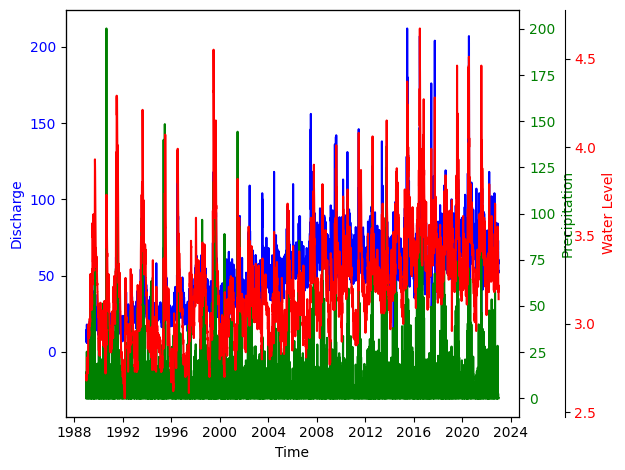

In [42]:
# Set the index back to a datetime object
fengqiao.index = pd.to_datetime(fengqiao.index)

# Plot discharge, precipitation, and water level columns in a time-ordered sequence
fig, ax1 = plt.subplots()

ax1.plot(fengqiao.index, fengqiao['discharge'], label='Discharge', color='b')
ax1.set_xlabel('Time')
ax1.set_ylabel('Discharge', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.plot(fengqiao.index, fengqiao['precipitation'], label='Precipitation', color='g')
ax2.set_ylabel('Precipitation', color='g')
ax2.tick_params(axis='y', labelcolor='g')

ax3 = ax1.twinx()  # instantiate a third axes that shares the same x-axis
ax3.spines['right'].set_position(('axes', 1.1))
ax3.plot(fengqiao.index, fengqiao['water_level'], label='Water Level', color='r')
ax3.set_ylabel('Water Level', color='r')
ax3.tick_params(axis='y', labelcolor='r')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

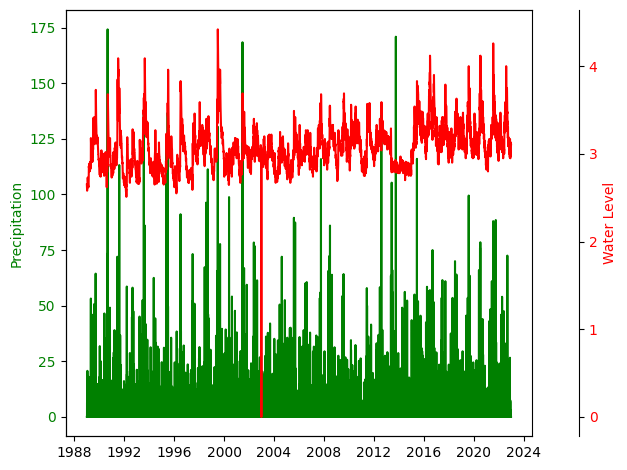

In [62]:
import matplotlib.pyplot as plt

# Set the index back to a datetime object
suzhou.index = pd.to_datetime(suzhou.index)

# Plot discharge, precipitation, and water level columns in a time-ordered sequence
fig, ax1 = plt.subplots()


ax1.plot(suzhou.index, suzhou['precipitation'], label='Precipitation', color='g')
ax1.set_ylabel('Precipitation', color='g')
ax1.tick_params(axis='y', labelcolor='g')

ax3 = ax1.twinx()  # instantiate a third axes that shares the same x-axis
ax3.spines['right'].set_position(('axes', 1.1))
ax3.plot(suzhou.index, suzhou['water_level'], label='Water Level', color='r')
ax3.set_ylabel('Water Level', color='r')
ax3.tick_params(axis='y', labelcolor='r')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# 缺失值处理

In [65]:
# 从已合并的 fengqiao.csv 读取数据
combined_fengqiao = pd.read_csv('../data/intermediate/fengqiao.csv', parse_dates=['time'])
combined_fengqiao.set_index('time', inplace=True)

# 对 discharge 列中的缺失数据或零值进行线性插值
combined_fengqiao['discharge'].replace(0, np.nan, inplace=True)
combined_fengqiao['discharge'].interpolate(method='linear', inplace=True)

# 对 water_level 列中的缺失数据或零值进行线性插值
combined_fengqiao['water_level'].replace(0, np.nan, inplace=True)
combined_fengqiao['water_level'].interpolate(method='linear', inplace=True)

# 将插值后的 DataFrame 保存到新的 fengqiao_interpolated.csv 文件
combined_fengqiao.to_csv('../data/intermediate/fengqiao_interpolated.csv')

print(combined_fengqiao.head())  # 输出插值后的 DataFrame 前几行，用于检查

            discharge  precipitation  water_level
time                                             
1989-01-01       7.00            0.0         2.71
1989-01-02       8.14            0.0         2.71
1989-01-03      10.60            0.0         2.70
1989-01-04      12.80            0.0         2.68
1989-01-05       8.58            0.9         2.68


In [66]:
# 从已合并的 suzhou.csv 读取数据
combined_suzhou = pd.read_csv('../data/intermediate/suzhou.csv', parse_dates=['time'])
combined_suzhou.set_index('time', inplace=True)

# 对 water_level 列中的缺失数据或零值进行线性插值
combined_suzhou['water_level'].replace(0, np.nan, inplace=True)
combined_suzhou['water_level'].interpolate(method='linear', inplace=True)

# 将插值后的 DataFrame 保存到新的 suzhou_interpolated.csv 文件
combined_suzhou.to_csv('../data/intermediate/suzhou_interpolated.csv')

print(combined_suzhou.head())  # 输出插值后的 DataFrame 前几行，用于检查

            precipitation  water_level
time                                  
1989-01-01            0.0         2.65
1989-01-02            0.0         2.64
1989-01-03            0.0         2.62
1989-01-04            0.0         2.60
1989-01-05            0.5         2.59


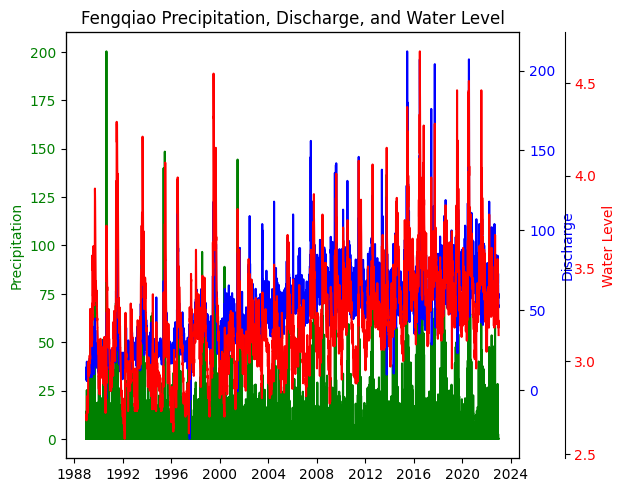

In [71]:
import matplotlib.pyplot as plt

# Load interpolated fengqiao data
fengqiao_interpolated = pd.read_csv('../data/intermediate/fengqiao_interpolated.csv', parse_dates=['time'])
fengqiao_interpolated.set_index('time', inplace=True)

# Set the index back to a datetime object
fengqiao_interpolated.index = pd.to_datetime(fengqiao_interpolated.index)

# Plot discharge, precipitation, and water level columns in a time-ordered sequence
fig, ax1 = plt.subplots()

ax1.plot(fengqiao_interpolated.index, fengqiao_interpolated['precipitation'], label='Precipitation', color='g')
ax1.set_ylabel('Precipitation', color='g')
ax1.tick_params(axis='y', labelcolor='g')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(fengqiao_interpolated.index, fengqiao_interpolated['discharge'], label='Discharge', color='b')
ax2.set_ylabel('Discharge', color='b')
ax2.tick_params(axis='y', labelcolor='b')

ax3 = ax1.twinx()  # instantiate a third axes that shares the same x-axis
ax3.spines['right'].set_position(('axes', 1.1))
ax3.plot(fengqiao_interpolated.index, fengqiao_interpolated['water_level'], label='Water Level', color='r')
ax3.set_ylabel('Water Level', color='r')
ax3.tick_params(axis='y', labelcolor='r')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Fengqiao Precipitation, Discharge, and Water Level')
plt.show()

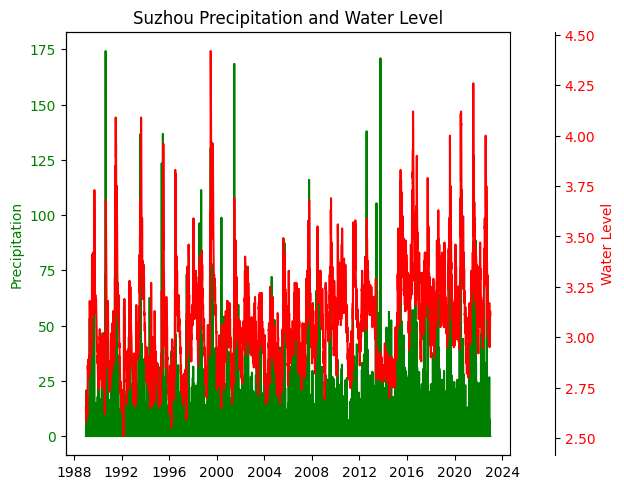

In [72]:
import matplotlib.pyplot as plt

# Load interpolated suzhou data
suzhou_interpolated = pd.read_csv('../data/intermediate/suzhou_interpolated.csv', parse_dates=['time'])
suzhou_interpolated.set_index('time', inplace=True)

# Set the index back to a datetime object
suzhou_interpolated.index = pd.to_datetime(suzhou_interpolated.index)

# Plot discharge, precipitation, and water level columns in a time-ordered sequence
fig, ax1 = plt.subplots()

ax1.plot(suzhou_interpolated.index, suzhou_interpolated['precipitation'], label='Precipitation', color='g')
ax1.set_ylabel('Precipitation', color='g')
ax1.tick_params(axis='y', labelcolor='g')

ax3 = ax1.twinx()  # instantiate a third axes that shares the same x-axis
ax3.spines['right'].set_position(('axes', 1.1))
ax3.plot(suzhou_interpolated.index, suzhou_interpolated['water_level'], label='Water Level', color='r')
ax3.set_ylabel('Water Level', color='r')
ax3.tick_params(axis='y', labelcolor='r')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Suzhou Precipitation and Water Level')
plt.show()

# 处理异常值

In [8]:
import numpy as np
from scipy.interpolate import interp1d
import pandas as pd

fengqiao = pd.read_csv('../data/intermediate/fengqiao_interpolated.csv', parse_dates=['time'])
discharge = np.array(fengqiao['discharge'].values)

# Find indices where discharge is negative
negative_indices = np.where(discharge < 0)[0]

# If there are negative values, replace them
if len(negative_indices) > 0:
    # Get indices of non-negative values
    non_negative_indices = np.where(discharge >= 0)[0]

    # Create an interpolation function based on non-negative values
    f = interp1d(non_negative_indices, discharge[non_negative_indices])

    # Use the function to fill in negative values
    for i in negative_indices:
        if i < non_negative_indices[0]:  # If the negative value is before the first non-negative value
            discharge[i] = discharge[non_negative_indices[0]]
        elif i > non_negative_indices[-1]:  # If the negative value is after the last non-negative value
            discharge[i] = discharge[non_negative_indices[-1]]
        else:  # If the negative value is between two non-negative values
            discharge[i] = f(i)
fengqiao['discharge'] = discharge
fengqiao.to_csv('../data/intermediate/fengqiao_processed.csv')

# 气象数据

In [5]:
# 读取CSV文件
data = pd.read_csv("../data/raw/mete/suzhou_input_data.csv")

# 删除YEAR, MO, DY列，因为它们已经包含在日期索引中
data = data.drop(columns=['YEAR', 'MO', 'DY'])

# 创建一个日期范围，从1989-01-01开始，与数据长度相同
date_range = pd.date_range(start='1989-01-01', periods=len(data), freq='D')

# 将索引设置为时间
data.index = date_range
data.index.name = 'time'

data

,T2M_MAX,T2M_MIN,RH2M,ALLSKY_SFC_SW_DWN,WS2M,PS,T2M
time,,,,,,,
1989-01-01,10.07,1.12,73.00,2.61,2.04,103.13,4.81
1989-01-02,12.39,0.13,76.44,2.13,1.65,102.68,5.83
1989-01-03,12.26,3.40,80.62,2.02,2.39,102.96,6.70
1989-01-04,12.15,4.04,69.94,1.22,3.62,103.20,7.05
1989-01-05,12.61,3.19,76.69,2.28,3.02,102.77,7.32
...,...,...,...,...,...,...,...
2022-12-27,8.31,-2.52,78.69,2.75,1.41,103.03,2.28
2022-12-28,7.74,0.19,82.88,1.67,2.12,103.19,3.28
2022-12-29,6.32,0.17,77.00,1.28,1.89,103.37,2.78


这些变量来自MERRA-2（Modern-Era Retrospective Analysis for Research and Applications, Version 2）和CERES SYN1deg（Clouds and the Earth's Radiant Energy System SYN1deg Edition 4A）数据集。以下是每个变量的解释：

* RH2M: MERRA-2 2米处的相对湿度（%）
* QV2M: MERRA-2 2米处的比湿（g/kg）
* PS: MERRA-2 地表气压（kPa）
* WS10M: MERRA-2 10米处的风速（m/s）
* WD10M: MERRA-2 10米处的风向（度）
* WS10M_MIN: MERRA-2 10米处的最小风速（m/s）
* WS10M_MAX: MERRA-2 10米处的最大风速（m/s）
* T2M_MIN: MERRA-2 2米处的最低气温（℃）
* T2M_MAX: MERRA-2 2米处的最高气温（℃）
* T2M: MERRA-2 2米处的气温（℃）
* ALLSKY_SFC_SW_DWN: CERES SYN1deg 全天空地表短波向下辐射（kW-hr/m^2/天）
* CLRSKY_SFC_SW_DWN: CERES SYN1deg 晴空地表短波向下辐射（kW-hr/m^2/天）
* WS2M: MERRA-2 2米处的风速（m/s）

这些变量可以帮助你了解气象和辐射条件，这些条件可能对水文过程和水资源管理产生影响。在建立水文模型时，你可以根据具体情况选择合适的变量作为输入。

In [6]:
data.to_csv('../data/intermediate/mete.csv')